<a href="https://colab.research.google.com/github/StillWork/ds-lab/blob/master/gg_17(1)_%EB%8D%B0%EC%9D%B4%ED%84%B0%ED%83%90%EC%83%89_%ED%81%B4%EB%9F%AC%EC%8A%A4%ED%84%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 클러스터링

- 거리기반  클러스터링(kMeans), 밀도기반 클러스터링(DBSCAN)
## 데이터
- 전력판매량(시도별/용도별) 액셀 파일

## 코랩에서 한글 폰트 설치

In [1]:
# 코랩을 사용하는 경우만 실행

# import matplotlib as mpl
# import matplotlib.pyplot as plt
# %config InlineBackend.figure_format = 'retina'
 
# !apt -qq -y install fonts-nanum
 
# import matplotlib.font_manager as fm
# fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
# font = fm.FontProperties(fname=fontpath, size=10)
# plt.rc('font', family='NanumBarunGothic') 
# mpl.font_manager._rebuild()

-  (주의) 여기서 런타임 - 런타임 다시 시작을 실행한 후에 위의 코드를 다시한번 실행하여야 한다

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## 한글 설치

In [1]:
import platform, matplotlib
from matplotlib import rc

# '-' 기호 제대로 보이기
matplotlib.rcParams['axes.unicode_minus'] = False

# 윈도우
if platform.system() == 'Windows':
    rc('font', family="Malgun Gothic")
# 맥
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
# 리눅스
elif platform.system() == 'Linux':
    rc('font', family='NanumBarunGothic')

데이터 읽기
--

In [5]:
power_data = pd.read_excel('https://github.com/StillWork/data/blob/master/power.xls?raw=true')
print(power_data.shape)
power_data[:3]

(19, 28)


구분       주거용      공공용      서비스업     업무용합계     농림어업      광업       제조업  \
0  강원   1940933  1400421   6203749   7604170   607139  398287   6002286   
1  개성         0        0         0         0        0       0         0   
2  경기  16587710  5533662  33434551  38968213  2371347  317263  56603327   

     식료품제조    섬유,의류  ...     기타기계    사무기기     전기기기     영상,음향      자동차    기타운송  \
0   546621    13027  ...    35063    2019    38062     43986   113448  108629   
1        0        0  ...        0       0        0         0        0       0   
2  2544420  2109963  ...  3613798  317244  1040171  24519644  2977165   67594   

     가구및기타    재생재료     산업용합계         합계  
0    12872    3418   7007712   16552816  
1        0       0         0          0  
2  1833112  133041  59291937  114847859  

[3 rows x 28 columns]

In [6]:
power_data.columns

Index(['구분', '주거용', '공공용', '서비스업', '업무용합계', '농림어업', '광업', '제조업', '식료품제조',
       '섬유,의류', '목재,나무', '펄프,종이', '출판,인쇄', '석유,화확', '의료,광학', '요업', '1차금속',
       '조립금속', '기타기계', '사무기기', '전기기기', '영상,음향', '자동차', '기타운송', '가구및기타', '재생재료',
       '산업용합계', '합계'],
      dtype='object')

In [7]:
power = power_data.set_index('구분')
power = power.drop(['합계', '개성'])
power = power.drop('합계', axis=1)

In [8]:
power.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, 강원 to 충북
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   주거용     17 non-null     int64
 1   공공용     17 non-null     int64
 2   서비스업    17 non-null     int64
 3   업무용합계   17 non-null     int64
 4   농림어업    17 non-null     int64
 5   광업      17 non-null     int64
 6   제조업     17 non-null     int64
 7   식료품제조   17 non-null     int64
 8   섬유,의류   17 non-null     int64
 9   목재,나무   17 non-null     int64
 10  펄프,종이   17 non-null     int64
 11  출판,인쇄   17 non-null     int64
 12  석유,화확   17 non-null     int64
 13  의료,광학   17 non-null     int64
 14  요업      17 non-null     int64
 15  1차금속    17 non-null     int64
 16  조립금속    17 non-null     int64
 17  기타기계    17 non-null     int64
 18  사무기기    17 non-null     int64
 19  전기기기    17 non-null     int64
 20  영상,음향   17 non-null     int64
 21  자동차     17 non-null     int64
 22  기타운송    17 non-null     int64
 23  가구및기타   17 non-null  

In [9]:
power.boxplot(figsize=(12,8))
plt.xticks(rotation=45)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26]),
 <a list of 26 Text xticklabel objects>)

In [10]:
power[['서비스업','제조업', '1차금속', '자동차']].boxplot(figsize=(10,6))

In [11]:
power.plot(kind='barh', figsize=(12,8), stacked=True)

In [13]:
power = power[['서비스업', '제조업']]
power.plot(kind='barh', figsize=(10,6), stacked=True)

In [19]:
power.head(5)

서비스업       제조업
구분                    
강원   6203749   6002286
경기  33434551  56603327
경남   8667737  18053778
경북   8487402  30115601
광주   3174973   2910768

데이터 탐색

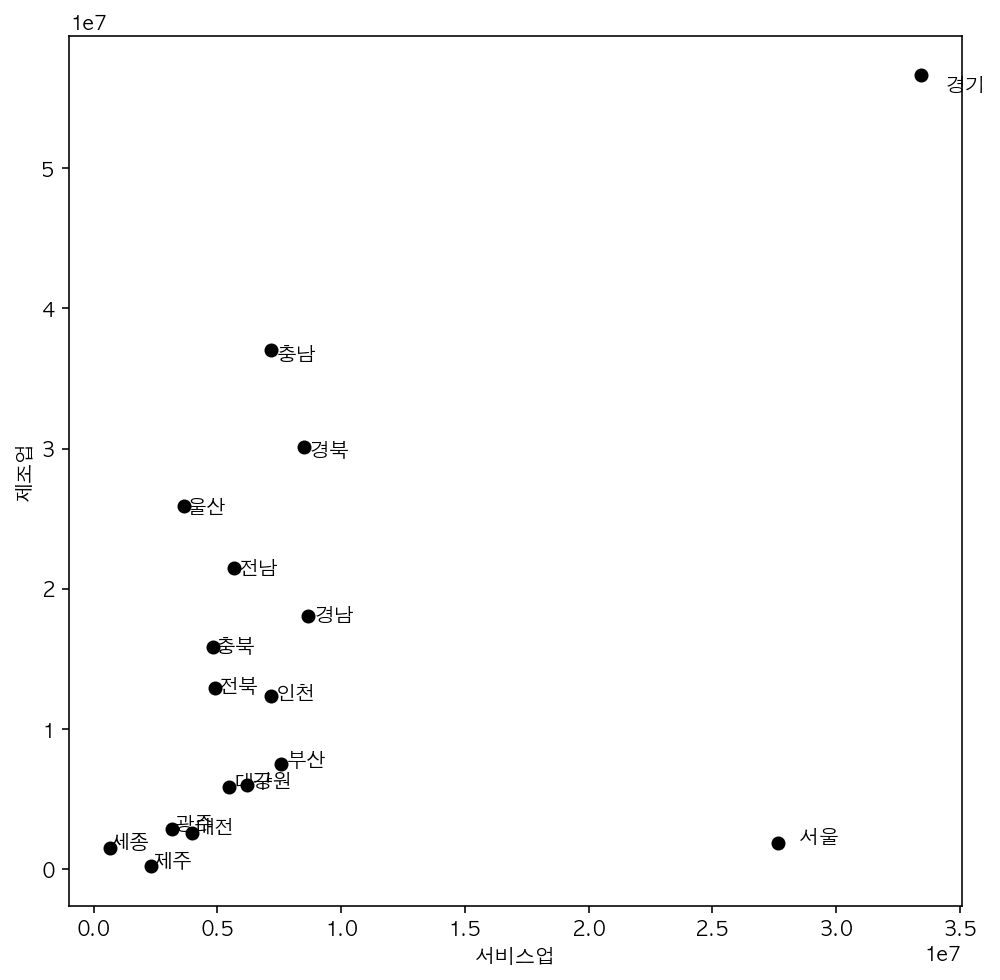

In [14]:
plt.figure(figsize=(8,8))
plt.scatter(power['서비스업'], power['제조업'],c='k',marker='o')
plt.xlabel('서비스업')
plt.ylabel('제조업')

for n in range(power.shape[0]):
    plt.text(power['서비스업'][n]*1.03, power['제조업'][n]*0.98, power.index[n])

### 아웃라이어

In [15]:
power = power.drop(['경기', '서울'])

In [16]:
plt.figure(figsize=(8,8))
plt.scatter(power['서비스업'], power['제조업'],c='k',marker='o')
plt.xlabel('서비스업')
plt.ylabel('제조업')

for n in range(power.shape[0]):
    plt.text(power['서비스업'][n]*1.03, power['제조업'][n]*0.98, power.index[n])

# 거리기반 클러스터링

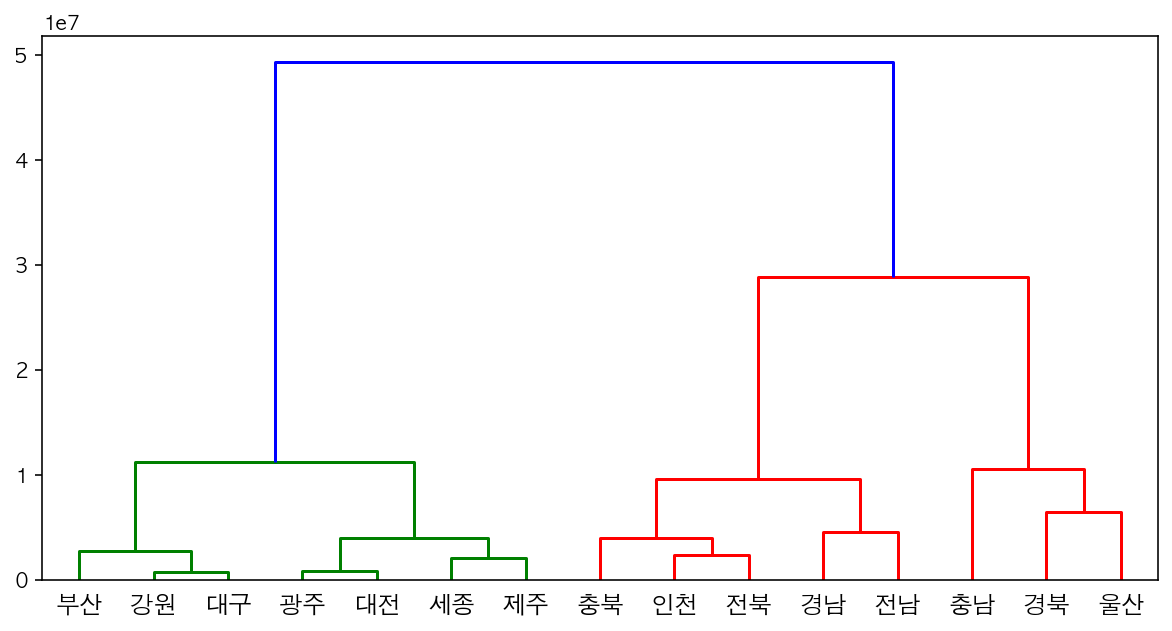

In [18]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
link_dist = linkage(power, metric='euclidean', method='ward')  
_= dendrogram(link_dist, labels=power.index.tolist())
# plt.show()

In [19]:
from sklearn.cluster import KMeans
k = KMeans(n_clusters=3) # (1) 모델 생성
k.fit(power) # (2) 모델 학습
k.labels_

array([2, 0, 1, 2, 2, 2, 2, 2, 1, 0, 0, 0, 2, 1, 0], dtype=int32)

In [20]:
power['클러스터'] = k.labels_
power.head(10)

서비스업       제조업  클러스터
구분                         
강원  6203749   6002286     2
경남  8667737  18053778     0
경북  8487402  30115601     1
광주  3174973   2910768     2
대구  5470438   5862633     2
대전  3955921   2608343     2
부산  7582169   7512588     2
세종   645424   1502922     2
울산  3649386  25883132     1
인천  7154416  12367816     0

In [21]:
power.drop('클러스터', axis = 1, inplace=True) ; power.head()

서비스업       제조업
구분                   
강원  6203749   6002286
경남  8667737  18053778
경북  8487402  30115601
광주  3174973   2910768
대구  5470438   5862633

In [23]:
centers = k.cluster_centers_ ; centers

array([[ 6245553.6       , 16144968.6       ],
       [ 6433742.33333333, 31018896.        ],
       [ 4191629.42857143,  3805868.14285714]])

In [25]:
my_markers=['*','^', 'o','^','.',',','1','2']
my_color =['r','c','g','b','g','k','r','y']

plt.figure(figsize=(10, 8))
plt.xlabel('서비스업')
plt.ylabel('제조업')
for n in range(power.shape[0]):
    label = k.labels_[n]
    plt.scatter(power['서비스업'][n], power['제조업'][n], c=my_color[label], marker=my_markers[label], s=30)
    plt.text(power['서비스업'][n]*1.03, power['제조업'][n]*0.98, power.index[n])
    
for i in range(k.n_clusters):
    plt.scatter(centers[i][0], centers[i][1], c = 'r', s= 100)

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
power[['서비스업', '제조업']] = scaler.fit_transform(power[['서비스업', '제조업']])
power[:10]

서비스업       제조업
구분                    
강원  0.393992 -0.676282
경남  1.498349  0.431200
경북  1.417523  1.539632
광주 -0.963503 -0.960380
대구  0.065323 -0.689116
대전 -0.613482 -0.988171
부산  1.011798 -0.537491
세종 -2.097244 -1.089755
울산 -0.750871  1.150686
인천  0.820080 -0.091316

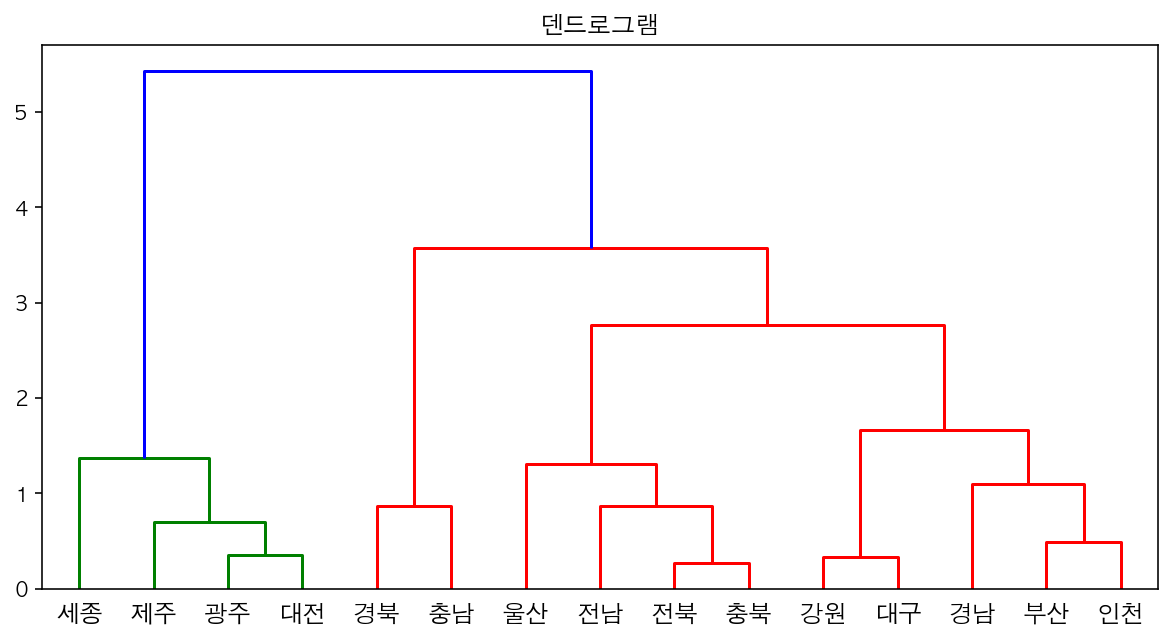

In [28]:
Z = linkage(power, metric='euclidean', method='ward') 
plt.figure(figsize=(10, 5))
plt.title('덴드로그램')
_=dendrogram(Z, labels=power.index.tolist())

In [29]:
k = KMeans(n_clusters= 4).fit(power)
centers = k.cluster_centers_

In [30]:
plt.clf()
plt.figure(figsize=(10, 8))
plt.xlabel('서비스업')
plt.ylabel('제조업')

for n in range(power.shape[0]):
    label = k.labels_[n]
    plt.scatter(power['서비스업'][n], power['제조업'][n], c=my_color[label], marker=my_markers[label], s=100)
    plt.text(power['서비스업'][n]*1.05, power['제조업'][n]*0.99, power.index[n])
    
for i in range(k.n_clusters):
    plt.scatter(centers[i][0], centers[i][1], c = 'r', s= 50)

<Figure size 432x288 with 0 Axes>

## 모든 특성 고려

In [34]:
power2 = power_data.set_index('구분')
power2.drop(['업무용합계', '산업용합계', '합계'], axis=1, 
           inplace=True, errors='ignore')
power2.drop(['합계','개성','경기','서울'], inplace=True,errors='ignore')

In [36]:
power2[:3].T

구분          강원        경남        경북
주거용    1940933   4260988   3302463
공공용    1400421   1427560   1578115
서비스업   6203749   8667737   8487402
농림어업    607139   2141813   1747462
광업      398287     95989    224568
제조업    6002286  18053778  30115601
식료품제조   546621    932743    566071
섬유,의류    13027    346974   3780171
목재,나무    19147     60160     72680
펄프,종이    24382    817685    361772
출판,인쇄     7727     28486     44402
석유,화확   175323   1865583   3653665
의료,광학    84397    178498    217771
요업     3695776    429920   1269917
1차금속   1038913   3809547  10874970
조립금속     39477   1699879    933178
기타기계     35063   1902913    782570
사무기기      2019      8070     14468
전기기기     38062    924235    750786
영상,음향    43986    534196   4174971
자동차     113448   2156059   2356890
기타운송    108629   2048646    123935
가구및기타    12872    262523     60280
재생재료      3418     47662     77104

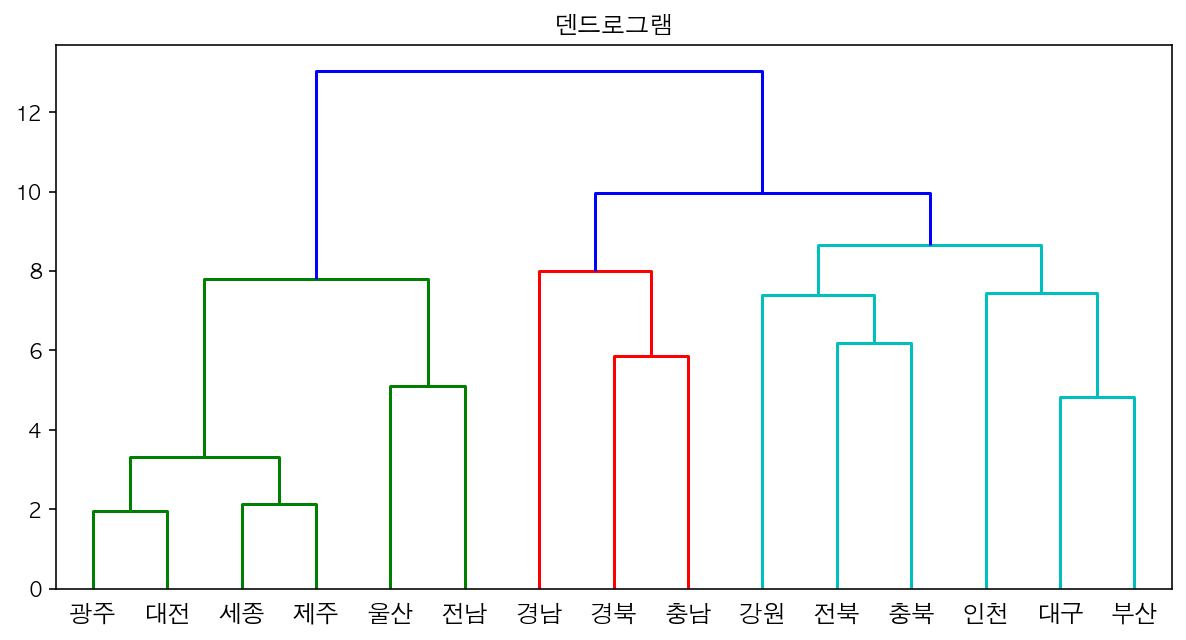

In [37]:
power3 = pd.DataFrame(scaler.fit_transform(power2), columns=power2.columns,
                      index=power2.index)

Z = linkage(power3, metric='euclidean', method='ward') 
# 유클리드 거리를 이용해 Linkage Matrix를 생성
plt.figure(figsize=(10, 5))
plt.title('덴드로그램')
_=dendrogram(Z, labels=power3.index.tolist())

In [38]:
k = KMeans(n_clusters=5).fit(power3)
n_samples = power3.shape[0]
print(n_samples)

plt.figure(figsize=(10, 8))
plt.xlabel('서비스업')
plt.ylabel('제조업')

for n in range(n_samples):
    label = k.labels_[n]
    plt.scatter(power3['서비스업'][n], power3['제조업'][n], c=my_color[label], marker=my_markers[label], s=100)
    plt.text(power3['서비스업'][n]*1.05, power3['제조업'][n]*0.99, power3.index[n])
    

15


# 밀도기반 클러스터링

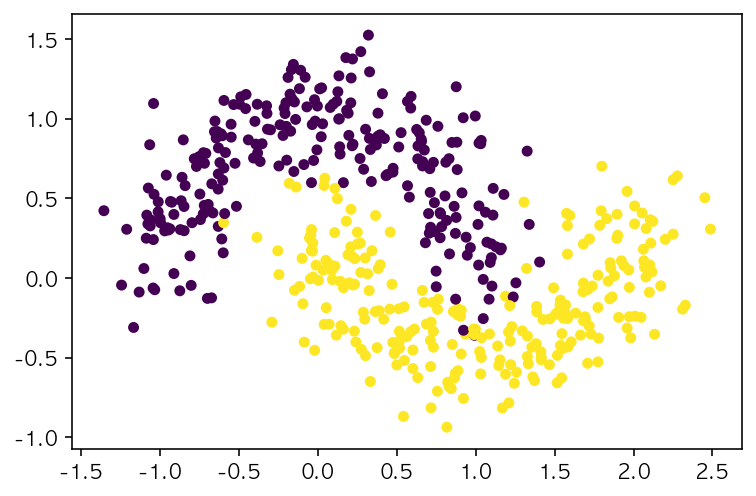

In [96]:
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
X, y = make_moons(n_samples=500, noise=0.2, random_state=11)
plt.scatter(X[:,0], X[:,1], c=y, s=20)
plt.show()

In [39]:
X[:10], y[:10]

NameError: name 'X' is not defined

In [98]:
kmeans = KMeans(n_clusters=2) # (1) 모델 생성, 정의, 생성자
kmeans.fit(X) # (2) 학습

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [99]:
kmeans.labels_

array([1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,

In [100]:
kmeans.predict([[1.5, 1],[-.5, 0.5],[0.5,0.5]]) # 다른 값 시도

array([0, 1, 1], dtype=int32)

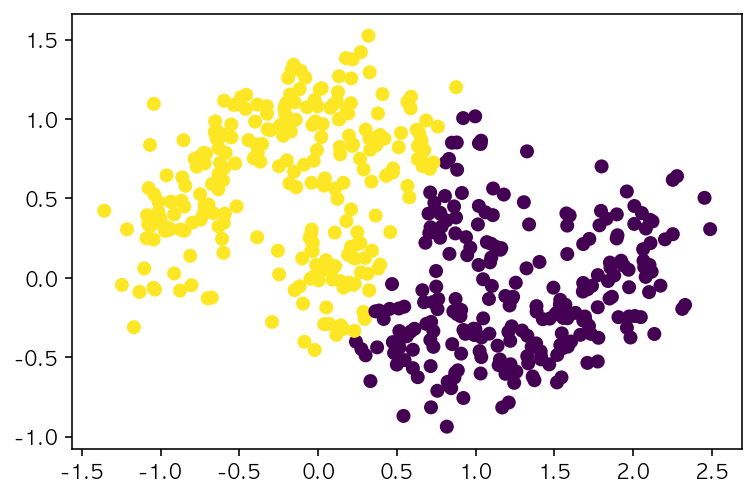

In [101]:
label_pred = kmeans.predict(X) # (3) 모델 사용 (클러스터 예측)
# label_pred = kmeans.fit_predict(X) # (2,3) 학습 및 모델 사용 (클러스터 예측)
plt.scatter(X[:,0], X[:,1],c=label_pred)

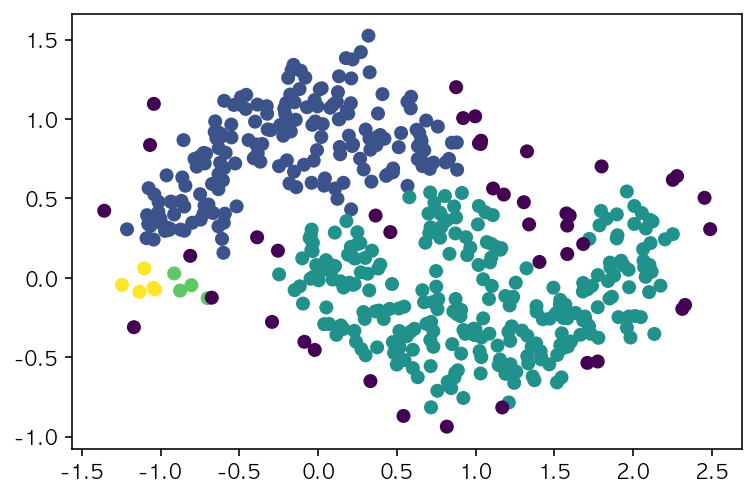

In [120]:
dbscan = DBSCAN(eps=0.14, min_samples=4, metric='euclidean')
predict = dbscan.fit_predict(X)
plt.scatter(X[:,0], X[:,1],c=predict)

In [121]:
predict[:10]

array([ 2,  0,  0,  0,  1,  1,  0,  0,  1, -1,  1, -1,  1,  1,  1, -1,  0,
        1,  1,  0,  0,  0,  1,  0,  1,  1,  1,  2,  1,  1,  1,  1, -1,  1,
        0,  1,  1,  1,  0,  1,  1,  0,  1,  0,  0,  1,  0,  1,  0,  1,  2,
        1,  0,  1,  1,  1, -1,  0,  1,  1,  1,  0,  0,  1,  1,  0,  0,  1,
        1,  1,  1,  1,  1,  1,  0, -1, -1,  1,  1,  0,  1,  0,  0,  0,  1,
        0,  1,  0,  0,  1,  0,  1,  1,  1,  1,  0, -1,  0, -1,  1,  1,  1,
        0,  1,  0,  1,  1,  0,  0,  0,  1,  1,  0,  1, -1,  1,  1,  1,  1,
        2,  0,  0,  1,  1,  0,  1,  0,  1,  1,  0,  0,  1,  0,  0,  0,  0,
        0,  0,  0,  1,  1,  1,  0,  1,  1, -1,  1,  1,  1,  0,  0, -1,  1,
        0,  1,  1,  0,  0,  1,  0,  1,  0,  0,  1,  0,  0,  1,  1,  0,  1,
        0,  1,  0,  0,  1,  0,  0,  0,  1,  0,  1,  0,  1,  1,  0,  0,  1,
        0,  1,  1,  1,  0,  0,  1,  1,  1,  1,  0,  1,  1,  0, -1,  1,  1,
        0,  1,  1,  1,  0,  1,  1,  0,  1,  0,  0,  0, -1,  1,  0, -1,  0,
       -1,  1,  0,  0,  1

In [108]:
dbscan = DBSCAN(eps=0.1, min_samples=10, metric='euclidean')
predict = dbscan.fit_predict(X)
plt.scatter(X[:,0], X[:,1],c=predict)

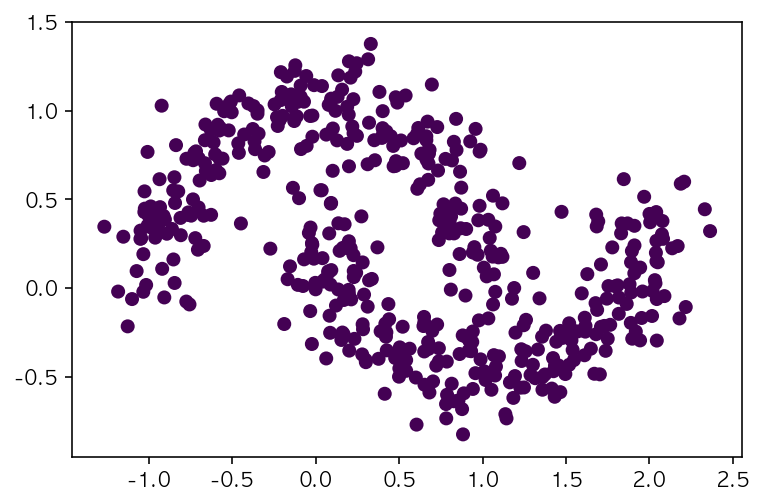

In [40]:
dbscan = DBSCAN(eps=0.5, min_samples=10, metric='euclidean')
predict = dbscan.fit_predict(X)
plt.scatter(X[:,0], X[:,1],c=predict)

In [41]:
dbscan = DBSCAN(eps=0.2, min_samples=6, metric='euclidean')
predict = dbscan.fit_predict(X)
plt.scatter(X[:,0], X[:,1],c=predict)

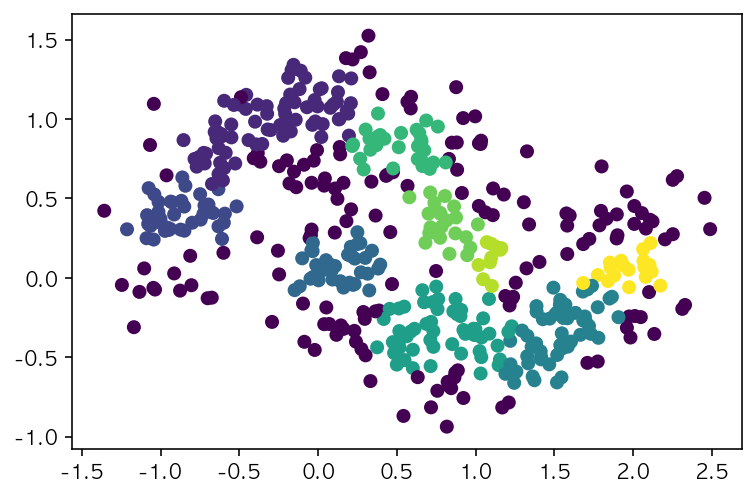

In [75]:
dbscan = DBSCAN(eps=0.16, min_samples=12, metric='euclidean')
predict = dbscan.fit_predict(X)
plt.scatter(X[:,0], X[:,1],c=predict)